### <center>2018 Winter CS101.03</center>

# <center>算法分析</center>

##### <center>by tanzhuxiaqiu@huawei.com</center>

## 今日议程

1. 实验研究
2. 常用函数
3. 渐进分析
4. 算法分析实例

## 实验研究

- 通过time模块
```python
from time import perf_counter as pc
start_time = pc()
# run algorithm
end_time = pc()
elapsed = end_time - start_time
```

- timeit模块

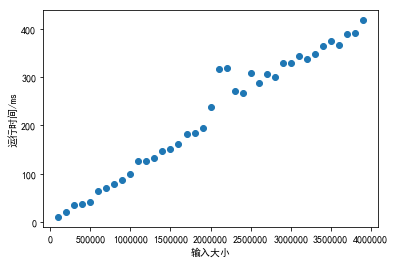

In [3]:
#coding:utf-8
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

def run_algorithm(n):
    array = np.random.randint(n, size=n)
    np.sort(array)

x = []
y = []
from time import perf_counter as pc
for n in range(100000, 4000000, 100000):
    start_time = pc()
    run_algorithm(n)
    end_time = pc()
    elapsed = end_time - start_time
    x.append(n)
    y.append(elapsed*1000)
plt.scatter(x, y)
plt.xlabel(u"输入大小")
plt.ylabel(u"运行时间/ms")
plt.show()

In [4]:
%%timeit
array = np.random.randint(4000000, size=4000000)
np.sort(array)

454 ms ± 42.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 当前实验分析的局限性

- 难以直接比较两个算法的实验运行时间，除非实验在相同的硬件和软件环境中执行
- 实验只有在有限的一组测试输入中才能完成
- 为了在实验上执行算法来研究其执行时间，算法必须完全实现

### 改进的实验分析


目标是设计一种分析算法效率的方法：

- 在软硬件环境独立的情况下，在某种程度上允许我们评价任意两个算法的相对效率
- 通过不需要具体实现的高层次算法描述来研究算法
- 考虑所有可能的输入

#### 计算原子操作

一个原子操作相当于一个低级别的指令，其执行时间是常数。

- 给对象指定一个标识符
- 确定与这个标识符相关联的对象
- 执行算术运算
- 比较两个数的大小
- 通过索引访问Python List中的一个元素
- 通过索引访问Python字典的一个元素
- 调用函数（不包括函数内的操作执行）
- 从函数返回

#### 随着输入函数的变化进行测量操作

为计算一个算法运行时间的增长情况，把每个算法和函数的f(n)联系起来——执行原子操作的数量描述为输入大小n的函数f(n)

#### 平均时间

- 平均时间需要一组输入对应的概率分布
- 涉及复杂的概率理论

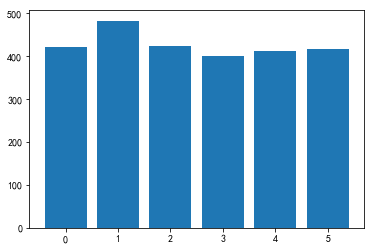

In [7]:
x = []
y = []
for n in range(6):
    start_time = pc()
    run_algorithm(4000000)
    end_time = pc()
    elapsed = end_time - start_time
    x.append(n)
    y.append(elapsed*1000)
plt.bar(x, y)
plt.show()

#### 最坏时间

- 最坏时间分析更为容易
- 一般按照最坏情况把算法的运行时间表示为输入大小n的函数f(n)

## 算法分析常用的函数

1. 常数函数 $ f(n) = c $
2. 对数函数 $ f(n) = log(n) $
3. 线性函数 $ f(n) = n $
4. nlogn函数 $ f(n) = n\ log(n) $  
5. 二次函数 $ f(n) = n^2 $  
    *  $ \sum_{i=0}^{n} {i} = \frac{n(n+1)}{2} $
6. 三次函数 $ f(n) = n^3 $
7. 指数函数 $ f(n) = a^n $

In [8]:
import timeit
from functools import partial
import random

def fconst(N):
    """O(1) function
    """
    x = 1

def flinear(N):
    """O(n) function
    """
    x = [i for i in range(N)] 
    
def fsquare(N):
    """O(n^2) function
    """
    for i in range(N):
        for j in range(N):
            x = i * j
    
def plotTC(fn, nMin, nMax, nInc, nTests):
    """Run timer and plot time complexity
    """
    x = [] 
    y = []
    for i in range(nMin, nMax, nInc):
        N = i
        testNTimer = timeit.Timer(partial(fn, N))
        t = testNTimer.timeit(number=nTests)
        x.append(i)
        y.append(t)
    plt.plot(x, y, 'o', label=fn.__name__)
    

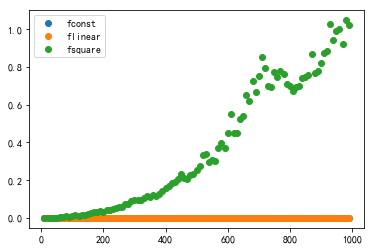

In [9]:
plotTC(fconst, 10, 1000, 10, 10)
plotTC(flinear, 10, 1000, 10, 10)
plotTC(fsquare, 10, 1000, 10, 10)
plt.legend()
plt.show()

### 比较增长率

| Big-O | Name |
| --- | --- |
| 1 | Constant |
| log(n) | Logarithmic |
| n	| Linear |
| nlog(n) | Log Linear |
| n^2 |	Quadratic |
| n^3 |	Cubic |
| 2^n |	Exponential |

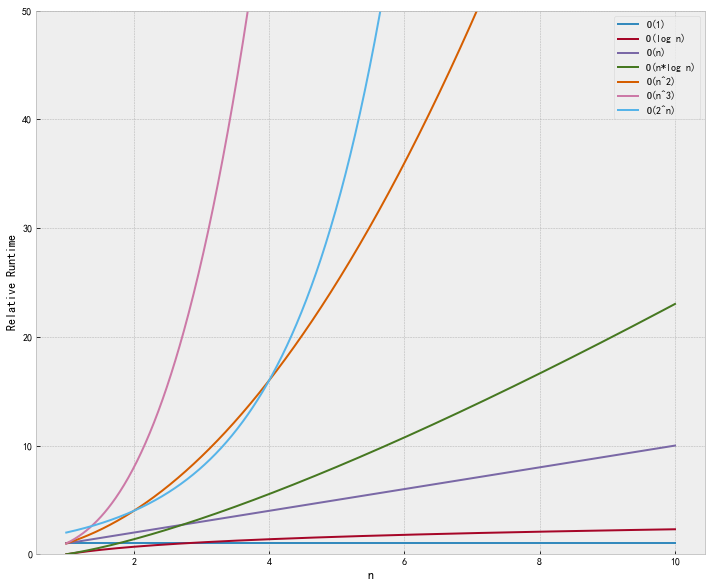

In [23]:
plt.style.use('bmh')
# Set up runtime comparisons
n = np.linspace(1,10,1000)
labels = ['O(1)','O(log n)','O(n)','O(n*log n)','O(n^2)','O(n^3)','O(2^n)']
big_o = [np.ones(n.shape),np.log(n),n,n*np.log(n),n**2,n**3,2**n]
# Plot setup
plt.figure(figsize=(12,10))
plt.ylim(0,50)

for i in range(len(big_o)):
    plt.plot(n,big_o[i],label = labels[i])
plt.legend(loc=0)
plt.ylabel('Relative Runtime')
plt.xlabel('n')
plt.show()

## 渐进分析

算法运行时间函数：对于输入为n的值，对应输出一个数据，用这个数据来反映关于n的增长率的主要因素。


#### 目的

找到最能反映增长率的因素，比如
- $f(n)=8n+5$
- $f(n)=5n^4+3n^3+2n^2+4n+1$
- $f(n)=5n^2+3n logn+2n+5$
- $f(n)=3logn+2$

的增长率怎么表示？

### 大O符号

> 对于$f(n)$和$g(n)$，如果有实数$c > 0$和整数$n_0 \geq 1$   
> 当$n \geq n_0$时，满足 $f(n) \leq cg(n)$   
> 就认为 $f(n)$ 是 $O(g(n))$

![](./img/3-1.png)

#### 渐进时间复杂度

- $f(n)=8n+5$是$O(n)$量级
- $f(n)=5n^4+3n^3+2n^2+4n+1$是$O(n^4)$量级
- $f(n)=5n^2+3n logn+2n+5$是$O(n^2)$量级
- $f(n)=3logn+2$是$O(logn)$量级
- $f(n)=2^{n+2}$是$O(2^n)$量级

> 大O时间复杂度又称为渐进时间复杂度(Asymptotic time complexity)   
> 并不具体表示代码真正的执行时间，而表示代码执行时间随数据规模增长的变化趋势

#### 比较

|$n$|O(1)|O(logn)|O(n)|O(nlogn)|O(n^2)|O(n^3)|O(2^n)|
|------|------|------|------|------|------|------|------|
|8    |1    |3    |8    |24   |64   | 512  | 256  |
|16|1|4|16|64|256|4096|65536|
|32|1|5|32|160|1024|32768|4294967296|
|64|1|6|64|384|4096|262144|$1.84\times10^{19}$|
|128|1|7|128|896|16383|2097152|$3.40\times10^{38}$|

#### 渐进空间复杂度

> 渐进空间复杂度(Asymptotic space complexity)，表示算法的存储空间与数据规模之间的增长关系

- 常见的空间复杂度 $O(1)、O(n)、O(n^2)$
- 相对时间复杂度分析简单

```python
def foo(n):
    l = list()
    for i in range(n):
        l.append(i)
    return l
```

- 时间复杂度O(n)
- 空间复杂度O(n)

## 算法分析示例

- 只关注循环执行次数最多的一段代码
- 加法法则：总复杂度读一量级最大的那段代码的复杂度
- 乘法法则：嵌套代码的复杂度等于嵌套内外代码复杂度的乘积

```python
i = 10
j = 20
sum = i + j
```

- 时间复杂度O(1)，不是<font color="#FF0000">O(3)</font>
- 一般情况下，只要算法中不存在循环语句、递归语句，即使有千万行代码，时间复杂度依然是O(1)

```python
i = 1
n = 100
while i <= n:
    i = i * 2
```

- 时间复杂度O(logn)

```python
i = 1
n = 100
while i <= n:
    i = i * 3
```

- 时间复杂度还是O(logn)，不是<font color="red">$O(log_3 n)$</font>
- $log_3n = log_32 \times log_2n$

```python
def foo(m, n):
    sum = 0
    for i in range(m):
        sum += i
    for j in range(n):
        sum += j
    return sum
```

- 时间复杂度O(m+n)
- 不确定m和n的数据规模，不能简单的省略掉

```python
def find_max(data):
    """Return the maximum element from a nonempty Python list.
    """
    max = data[0]
    for val in data:
        if val > max:
            max = val
    return max
```

- O(n)
- 最坏时间

In [28]:
def prefix_average1(S):
    """Return list such that, for all j, A[j] equals average of S[0], ..., S[j].
    """
    n = len(S)
    A = [0] * n
    for j in range(n):
        total = 0
        for i in range(j+1):
            total += S[i]
        A[j] = total / (j+1)
    return A

- $O(n^2)$
- $ \sum_{i=0}^{n} {i} = \frac{n(n+1)}{2} $

In [29]:
def prefix_average2(S):
    """Return list such that, for all j, A[j] equals average of S[0], ..., S[j].
    """
    n = len(S)
    A = [0] * n
    for j in range(n):
        A[j] = sum(S[0:j+1]) / (j+1)
    return A

- $O(n^2)$
- sum函数调用是O(1)，但sum函数内部是O(j+1)

In [30]:
def prefix_average3(S):
    """Return list such that, for all j, A[j] equals average of S[0], ..., S[j].
    """
    n = len(S)
    A = [0] * n
    total = 0
    for j in range(n):
        total += S[j]
        A[j] = total / (j+1)
    return A

- O(n)

In [34]:
%timeit prefix_average1([x for x in range(1000)])
%timeit prefix_average2([x for x in range(1000)])
%timeit prefix_average3([x for x in range(1000)])

50.4 ms ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
9.53 ms ± 616 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
337 µs ± 9.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 课后阅读

阅读两篇相关资料

* [Big-O Notation Explained](http://stackoverflow.com/questions/487258/plain-english-explanation-of-big-o/487278#487278)

* [Big-O Examples Explained](http://stackoverflow.com/questions/2307283/what-does-olog-n-mean-exactly)

# Any Questions?